# Aula 1: Ciência de Dados e suas etapas

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

Nesta aula, vamos mostrar como descrevemos os dados em termos de medidas de estatística. Medidas de posição, dispersão e correlação serão cobertas, com aplicações em diferentes conjuntos de dados.

## Medidas de posição

### Moda

Uma medida importante de tendência central é a moda, que retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais.<br> 
Vamos considerar um exemplo.

In [1]:
import numpy as np 
X = [0,1,1,2,2,2,3,3]
print('X:', X)

X: [0, 1, 1, 2, 2, 2, 3, 3]


Para calcularmos a moda, usamos o pacote Statistics:

In [2]:
from statistics import mode
m = mode(X)
print('A moda de X:', m)

A moda de X: 2


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X: [0, 1, 1, 2, 2, 2, 3, 3]
Valores possíveis: [0 1 2 3]
Frequencia dos valores: [1. 2. 3. 2.]


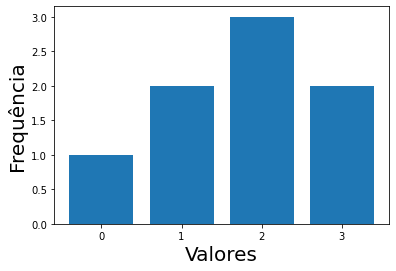

In [3]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

# Usamos a funções sort e unique do Numpy para encontrar os valores possíveis em ordem crescente.
# esses valores serão mostrados na abscissa do gráfico.
values = np.sort(np.unique(X)) 
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(X)):
        if(X[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X:',X)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xlabel("Valores",fontsize = 20) 
plt.ylabel("Frequência", fontsize = 20) 


plt.show()

Podemos aplicar a função em dados nominais:

In [4]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y:', mode(Y))

A moda de Y: red


O gráfico de barras mostrando a frequêbncia:

Y: ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequencia dos valores: [2. 1. 4.]


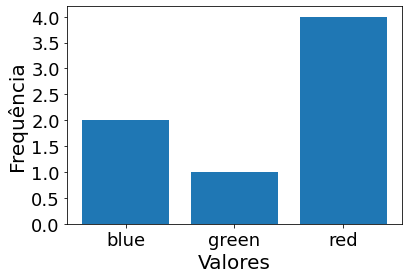

In [5]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Valores",fontsize = 20) 
plt.ylabel("Frequência", fontsize = 20) 
plt.show()

### Média e Mediana

A média e mediana são medidas de tendência central usadas para dados quantitativos. Assim, a média:

In [6]:
import numpy as np 
X = [1,1,1,2,2,3,4,5,5,5]
mx = np.mean(X)
print('X:', X)
print('A média:', mx)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A média: 2.9


No caso da mediana:

In [7]:
md = np.median(X)
print('X:', X)
print('A mediana:', md)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A mediana: 2.5


Se adicionarmos um valor extremo aos dados, vejamos como a média e a mediana se comportam:

In [8]:
X2 = [1,1,1,2,2,3,4,5,5,100]
print('X2:', X2)
print('A nova média:', np.mean(X2))
print('A nova mediana:', np.median(X2))

X2: [1, 1, 1, 2, 2, 3, 4, 5, 5, 100]
A nova média: 12.4
A nova mediana: 2.5


Ou seja, a média é altamente sensível a valores extremos, enquanto que a mediana é mais robusta.

Vamos considerar uma distribuição de probabilidades. Os dados são gerados a partir de distribuições normal e exponencial.

Para a distribuição normal, a média é indicada pela linha contínua e a mediana, pela tracejada.

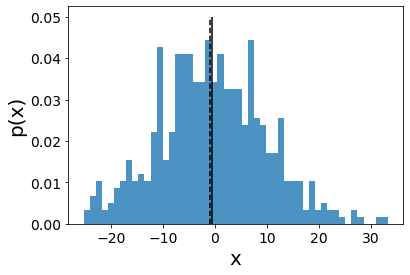

In [9]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

mu = 0 # Média da distribuicao normal
sigma = 10 #desvio padrão da distribuição normal
Y = np.random.normal(mu, sigma, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,0.05)
plt.vlines(md,0,0.05, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20) 
plt.ylabel("p(x)", fontsize = 20) 
plt.show(True)

Para a distribuição exponencial, a média é indicada pela linha contínua e a mediana, pela tracejada.

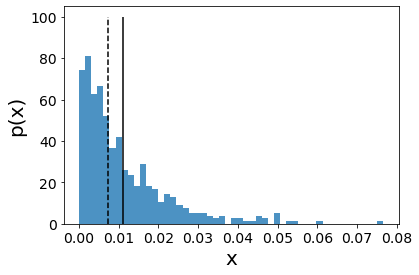

In [10]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

lbda = 100 # taxa da distribuição exponencial
beta = 1.0/lbda

Y = np.random.exponential(beta, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20) 
plt.ylabel("p(x)", fontsize = 20) 

plt.show(True)

Notamos que a média é similar à mediana se a distribuição é praticamente simétrica em relação à média. Caso a distribuição não seja simétrica, o mais adequado é usar a mediana como medida central.

## Medidas de dispersão

As medidas de dispersão mais usadas são a variância e o desvio padrão. A distância interquantil (IQR) também é bastante usada e quantifica a diferença entre o terceiro e primeiro quantil. Já a amplitude simplesmente mede a diferença entre os valores máximo e mínimo.

In [11]:
from scipy.stats import iqr

def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

X = [0,0,1,1,18]
Y = [4, 4, 4, 4, 4]
mx = np.mean(X)
my = np.mean(Y)
print('X:', X)
print('Média de X:', mx)
print('Variância de X:', variancia(X))
print('IQR de X:', iqr(X))
print('Amplitude de X:', np.max(X)-np.min(X))

print('\n')
print('Y:', Y)
print('Média de Y:', my)
print('Variância de Y:', variancia(Y))
print('IQR de Y:', iqr(Y))
print('Amplitude de Y:', np.max(Y)-np.min(Y))

X: [0, 0, 1, 1, 18]
Média de X: 4.0
Variância de X: 61.5
IQR de X: 1.0
Amplitude de X: 18


Y: [4, 4, 4, 4, 4]
Média de Y: 4.0
Variância de Y: 0.0
IQR de Y: 0.0
Amplitude de Y: 0


Notem que os dados acima possuem a mesma média, mas a variância é bastante diferente.

## Correlação

Vamos considerar alguns casos para vermos como se comporta o coeficiente de correlação de Pearson de acordo com diferentes tendências entre as variáveis $X$ e $Y$.

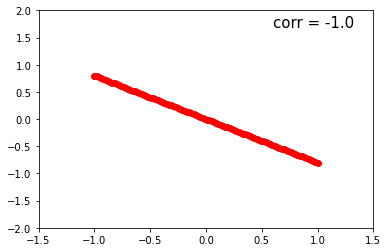

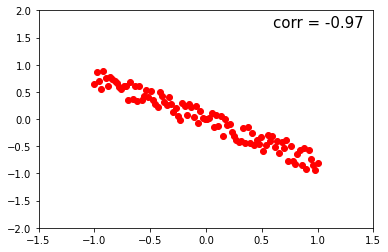

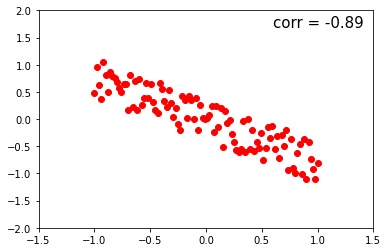

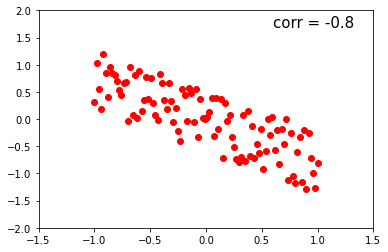

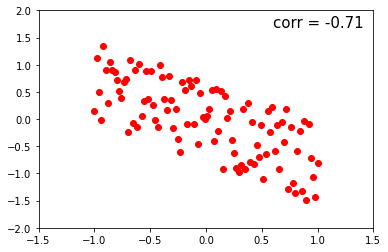

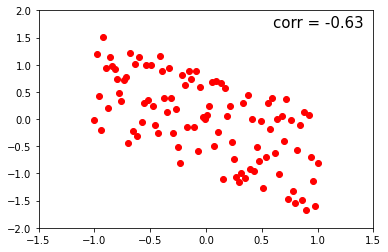

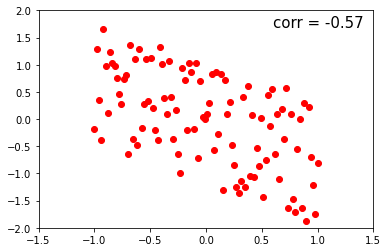

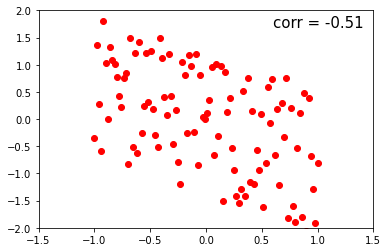

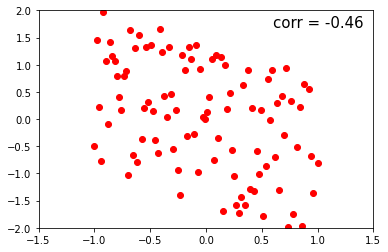

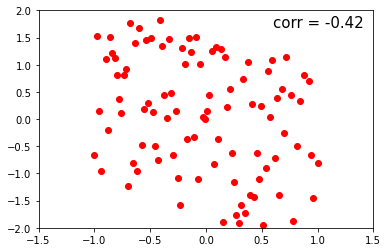

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

N = 100
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = -0.8*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    string = 'corr = '+ str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.show(True)

A medida de correlação é importante para analisar a relação entre as variáveis. Se duas variáveis são altamente correlacionadas, é adequado remover uma delas, de modo a reduzir informação redundante nos dados.

Vamos considerar a base de dados da flor Iris:

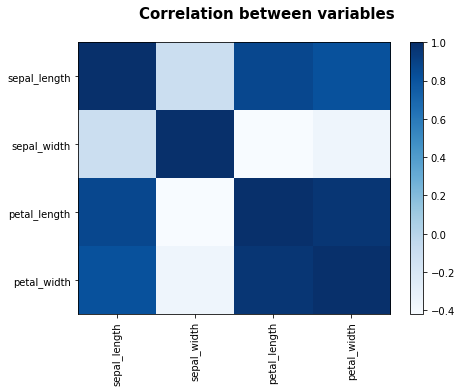

In [14]:
import pandas as pd # biblioteca pandas
data = pd.read_csv('data/iris.csv', header=(0)) # lê os dados a partir do arquivo

corr = data.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Podemos mostrar a mesma tabela usando a biblioteca Searborn:

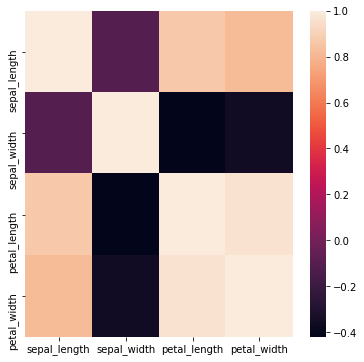

In [15]:
import seaborn as sns
plt.figure(figsize= (6, 6))
sns.heatmap(data.corr())
plt.show(sns)

Para obtermos um resumo das medidas estatística dos dados:

In [16]:
data.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Além do coeficiente de Pearson, podemos considerar o coeficiente de correlação de Spearman:

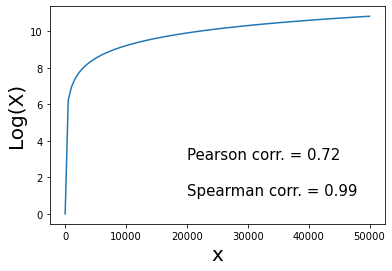

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 100
x = np.linspace(1, 50000, N) 
z = np.log(x)

plt.plot(x, z) 
plt.xlabel("x",fontsize = 20) 
plt.ylabel("Log(X)", fontsize = 20) 
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()

Notem que nesse caso, os coeficientes de Spearman e Pearson são diferentes. Veja o material da aula teórica.

### Medidas de Entropia

A entropia de Shannon para um dado de N lados:

In [18]:
from scipy.stats import entropy
N = 6
Px = np.ones(N)*1/N
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Entropia de Shannon:  2.584962500721156


Notem que essa entropia é máxima, visto que a distribuição uniforme é a que oferece maior informação e maior dificuldade na previsao. Para um vetor com um único valor, a entropia é mínima (ou seja, um dado com faces iguais).
Vejam o exemplo abaixo para uma moeda cujas probabilidade de sair cara e coroa variam. Modifique os valores e veja o que acontece com a entropia.

In [19]:
from scipy.stats import entropy
Px = [1, 0] # probabilidade de sair cara e coroa
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Px = [0.75, 0.25] # a soma dos elementos do vetor deve ser igual a 1.
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Px = [0.5, 0.5]
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Entropia de Shannon:  0.0
Entropia de Shannon:  0.8112781244591328
Entropia de Shannon:  1.0


Entropia de relativa (divergência de Kulback-Leibler) pode ser usada para comparar distribuições.

In [20]:
from scipy.stats import entropy
P = [0.25,0.55,0.2]
Q = [0.33, 0.33, 0.33]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.10134076548572564
KL(Q,P) =  0.09924413610176085


Se as distribuições forem iguais.

In [21]:
print('KL(P,P) = ', entropy(P,P, base = np.exp(1)))
print('KL(Q,Q) = ', entropy(Q,Q, base = np.exp(1)))

KL(P,P) =  0.0
KL(Q,Q) =  0.0


## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 -  Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

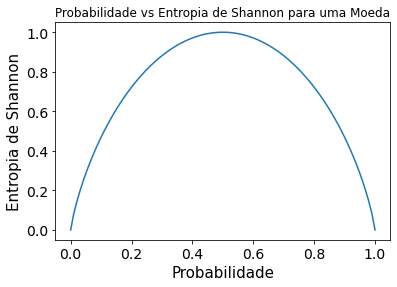

In [30]:
# Ex.1
from scipy.stats import entropy

probabilidade = np.linspace(0,1,100) # cria uma array (vetor) de probabilidades entre 0 e 1
entropia = entropy([probabilidade, 1-probabilidade], base = 2) # cria uma array de entropias para uma moeda

#Criando uma array de entropias com laço for
#entropia = []
#for p in probabilidade:
#    entropia_p = entropy([probabilidade, 1-probabilidade], base = 2)
#    entropia.append(entropia_p)
    
plt.xlabel('Probabilidade',fontsize=15)
plt.ylabel('Entropia de Shannon',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Probabilidade vs Entropia de Shannon para uma Moeda')
plt.plot(probabilidade, entropia)  # plota probabilidade em x (abcissa) e entropia em y (ordenada)

2 - Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

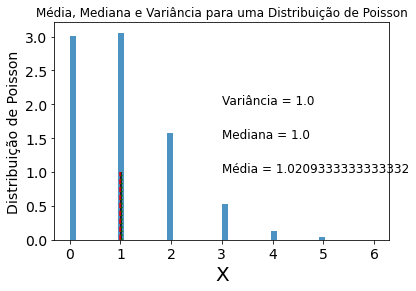

In [83]:
import numpy as np
import matplotlib.pyplot as plt

lbda = 1 # média da distribuição de poisson

X = np.random.poisson(lbda, size=15000)       # gera uma distribuição de Poisson
plt.hist(X, density=True, bins=50,lw=0,alpha=.8)

#  a média é indicada pela linha contínua preta, a mediana pela tracejada vermelha, e a variância pela pontilhada verde
m = np.mean(X)
md = np.median(X)
var = np.var(X)
string = 'Média = '+ str(m)
plt.text(3,1, string, fontsize=12)
string = 'Mediana = '+ str(md)
plt.text(3,1.5, string, fontsize=12)
string = 'Variância = '+ str(md)
plt.text(3,2, string, fontsize=12)

plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed', colors = 'r')
plt.vlines(var,0,lbda, linestyles = 'dotted', colors = 'g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X",fontsize = 20) 
plt.ylabel("Distribuição de Poisson", fontsize = 14) 
plt.title('Média, Mediana e Variância para uma Distribuição de Poisson')

plt.show(True)

In [84]:
# Imprimindo os resultados
print(f"Mean: {np.mean(X)}")
print(f"Median: {np.median(X)}")
print(f"Variance: {np.var(X)}")  


Mean: 1.0209333333333332
Median: 1.0
Variance: 1.023695128888889


3 - Calcula e a divergência de Kullback-Leibler entre as distribuições Normal e Poisson. Gerem os dados com mesma média e variância.

KL(N,P) =  0.020457550413871435
KL(P,N) =  0.02608773212551884
KL(N,N) =  0.0
KL(P,P) =  0.0


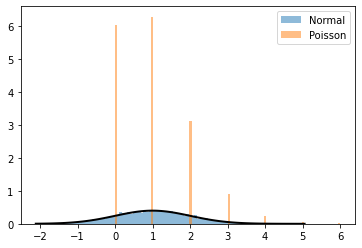

In [96]:
# Gerando as distribuições Normal e Poisson
Media = 1
Variancia = 1
Desvio_Padrao = np.sqrt(Variancia)
Tamanho = 5000

xn = np.random.normal(loc=Media, scale=Desvio_Padrao, size=Tamanho)
xp = np.random.poisson(lam=Variancia, size=Tamanho)

hist_n, _= np.histogram(xn,np.arange(0,5))   # da função histograma só me interessa a distribuição: hist_n, vals_n
dist_n = hist_n / np.sum(hist_n)             # normalizando para poder comparar

hist_p, _= np.histogram(xp,np.arange(0,5))   # da função histograma só me interessa a distribuição: hist_p, vals_p
dist_p = hist_p / np.sum(hist_p)             # normalizando para poder comparar


from scipy.stats import entropy

# Calculando a entropia relativa = divergência de Kullback-Leibler (KL)
print('KL(N,P) = ', entropy(dist_n,dist_p, base = np.exp(1)))
print('KL(P,N) = ', entropy(dist_p,dist_n, base = np.exp(1)))

# Confirmando que divergência de Kullback-Leibler (KL) = 0 se as distribuições forem iguais
print('KL(N,N) = ', entropy(dist_n,dist_n, base = np.exp(1)))
print('KL(P,P) = ', entropy(dist_p,dist_p, base = np.exp(1)))

# Gráfico
from scipy import stats
plt.hist(xn, density=True, bins=100, alpha=0.5, label="Normal")
plt.hist(xp, density=True, bins=100, alpha=0.5, label="Poisson")

x = np.linspace(min(xn), max(xn), 100)
p = stats.norm.pdf(x, Media, Desvio_Padrao)             # pdf = função de distribuição de probabilidade
plt.plot(x, p, 'k', linewidth=2)

plt.legend()
plt.show()


4 - Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância.

KL(B,P) =  0.963803900564888
KL(P,B) =  inf
KL(B,B) =  0.0
KL(P,P) =  0.0


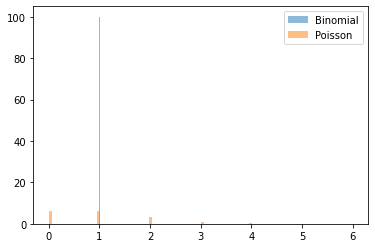

In [98]:
# Gerando as distribuições Binomial e Poisson
Media = 1
Variancia = 1
Desvio_Padrao = np.sqrt(Variancia)
Tamanho = 5000

xb = np.random.binomial(n=Media, p=Variancia, size=Tamanho)
xp = np.random.poisson(lam=Variancia, size=Tamanho)

hist_b, _= np.histogram(xb,np.arange(0,5))   # da função histograma só me interessa a distribuição: hist_n, vals_n
dist_b = hist_b / np.sum(hist_b)             # normalizando para poder comparar

hist_p, _= np.histogram(xp,np.arange(0,5))   # da função histograma só me interessa a distribuição: hist_p, vals_p
dist_p = hist_p / np.sum(hist_p)             # normalizando para poder comparar


from scipy.stats import entropy

# Calculando a entropia relativa = divergência de Kullback-Leibler (KL)
print('KL(B,P) = ', entropy(dist_b,dist_p, base = np.exp(1)))
print('KL(P,B) = ', entropy(dist_p,dist_b, base = np.exp(1)))

# Confirmando que divergência de Kullback-Leibler (KL) = 0 se as distribuições forem iguais
print('KL(B,B) = ', entropy(dist_b,dist_b, base = np.exp(1)))
print('KL(P,P) = ', entropy(dist_p,dist_p, base = np.exp(1)))

# Gráfico
from scipy import stats
plt.hist(xb, density=True, bins=100, alpha=0.5, label="Binomial")
plt.hist(xp, density=True, bins=100, alpha=0.5, label="Poisson")

x = np.linspace(min(xb), max(xb), 100)
p = stats.binom.pmf(x, Media, Variancia)             # pdf = função massa de probabilidade
plt.plot(x, p, 'k', linewidth=2)

plt.legend()
plt.show()

5 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

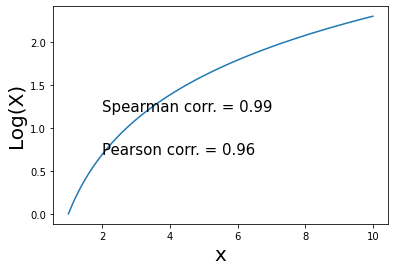

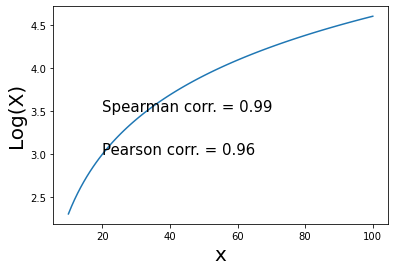

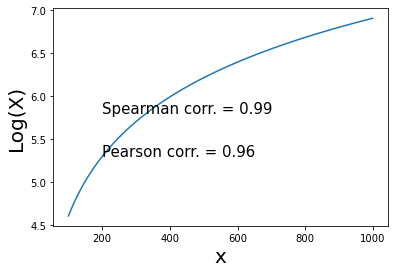

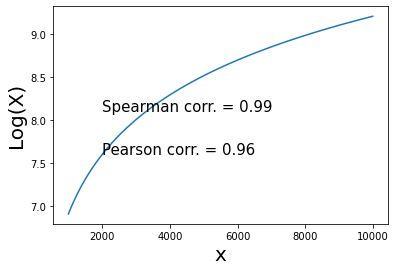

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

inicio = [1,10,100,1000]

for a in inicio:
    N = 100
    x = np.linspace(start=a, stop=a*10, num=N) 
    z = np.log(x) 
    plt.plot(x, z) 
    plt.xlabel("x",fontsize = 20)
    plt.ylabel("Log(X)", fontsize = 20) 
    corr, p_value = pearsonr(x, z)
    corrs, p_values = spearmanr(x, z)
    corr = int(corr*100)/100
    corrs = int(corrs*100)/100
    string = 'Pearson corr. = '+ str(corr)
    plt.text(a*10/5, np.log(a*10/5), string, fontsize=15)
    string = 'Spearman corr. = '+ str(corrs)
    plt.text(a*10/5, np.log(a*10/5)+0.5, string, fontsize=15)
    plt.show()
